In [1]:
from src.parsers import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [304]:
hrs = np.load('data/all_data_hr.npy')
cads = np.load('data/all_data_cad.npy')
pws = np.load('data/all_data_pwr.npy')
dates = np.load('data/all_data_dates.npy')

In [305]:
#Create a list of dataframes for all of the rides
all_dfs = []
for i in range(len(hrs)):
    df = pd.DataFrame()
    df['HR'] = hrs[i]
    df['CAD'] = cads[i]
    df['PWR'] = pws[i]
    df['DATE'] = [dates[i]]*len(hrs[i])
    # deletes instances of heart rate below resting heart rate
    df = df[df['HR'] > 75]
    all_dfs.append(df)

In [306]:
hrs = np.array([np.array(df['HR']) for df in all_dfs])
cads = np.array([np.array(df['CAD']) for df in all_dfs])
pws = np.array([np.array(df['PWR']) for df in all_dfs])

In [307]:
np.array(all_dfs[0]['HR'])

array([ 97,  98,  97, ..., 145, 145, 146])

In [308]:
len(np.hstack(hrs))

1101929

In [309]:
len(np.hstack(hrs2))

1133571

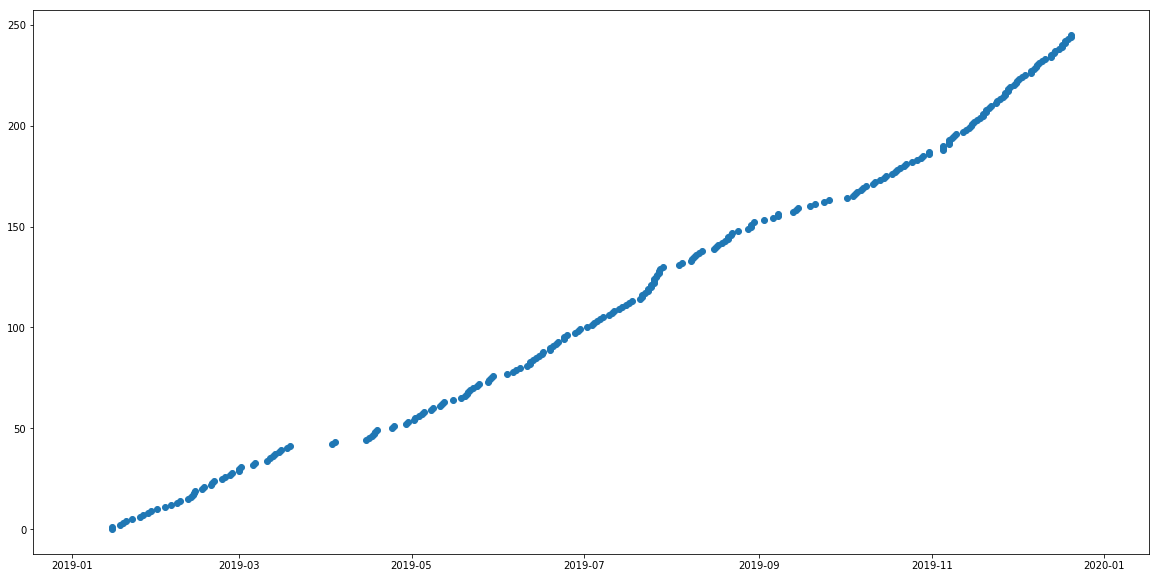

In [310]:
fig = plt.figure(figsize=(20,10))
plt.scatter(list(dates), np.arange(len(dates)))

In [311]:
hr_avg = [np.nanmean(f) for f in list(hrs)]
pw_avg = [np.nanmean(f) for f in list(pws)]

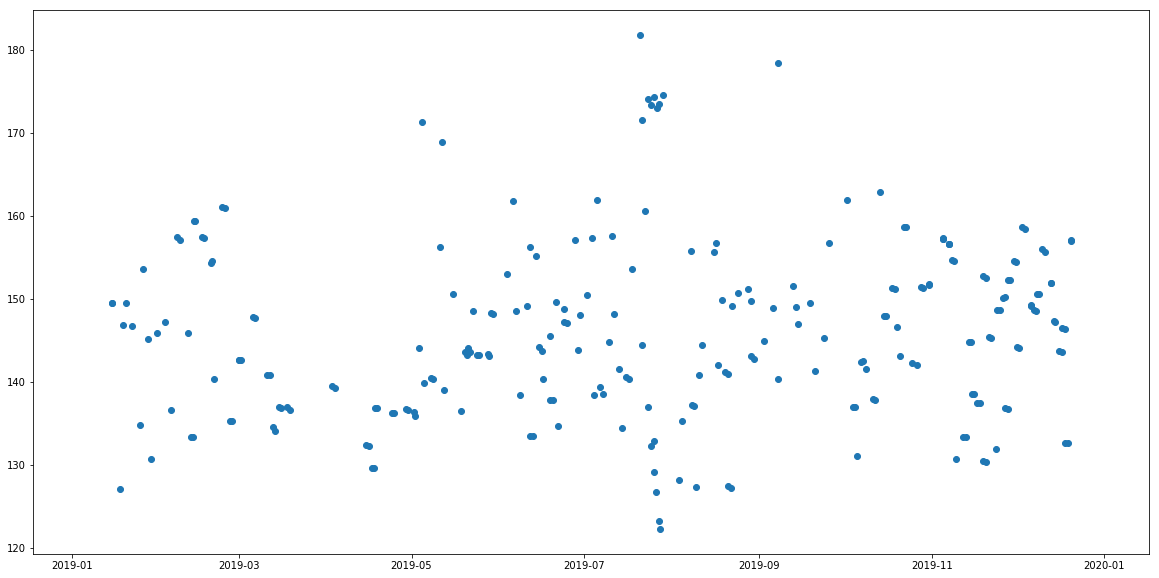

In [312]:
fig = plt.figure(figsize=(20,10))
plt.scatter(dates, hr_avg)

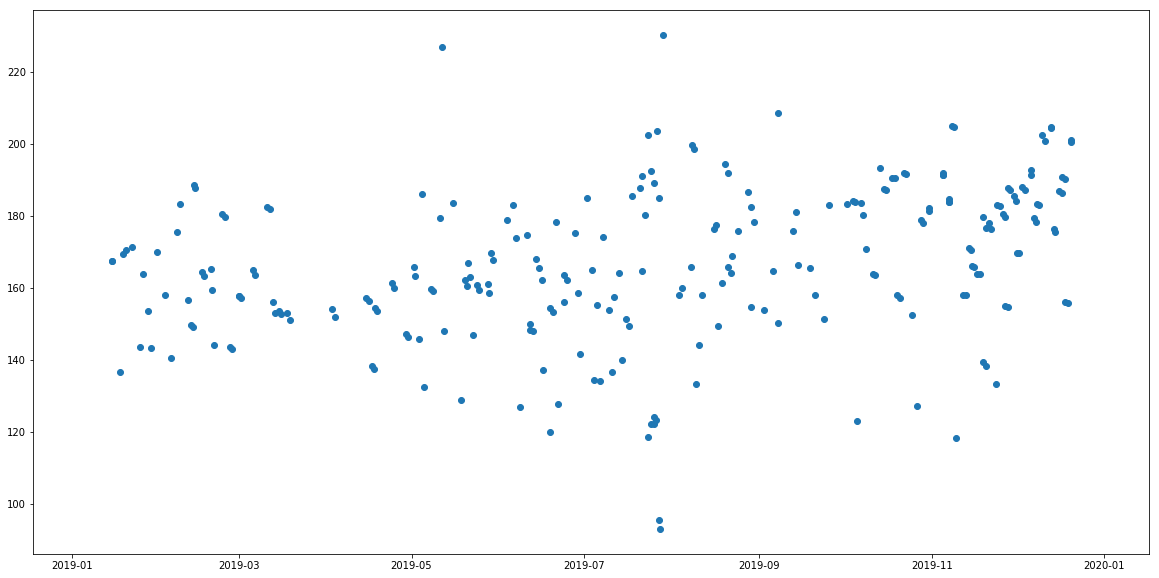

In [313]:
fig = plt.figure(figsize=(20,10))
plt.scatter(dates, pw_avg)

In [314]:
# Calculated by dividing power/ heart rate at each timestep before averaging entire ride
pw_hr2 = []
for i in range(len(pws)):
    pw_hr2.append(np.nanmean(pws[i]/hrs[i]))

In [315]:
len(pw_hr2)

246

In [316]:
pw_hr3 = []
for i in range(len(pws)):
    pw_hr3.append(np.nanmean(pws[i]/(hrs[i]-65)))

In [317]:
dates[[127, 129, 162]]

array(['2019-07-27T14:02:49.000000000', '2019-07-27T16:17:59.000000000',
       '2019-09-23T20:00:03.000000000'], dtype='datetime64[ns]')

In [318]:
np.where(np.array(pw_avg) < 100)[0]

array([127, 129])

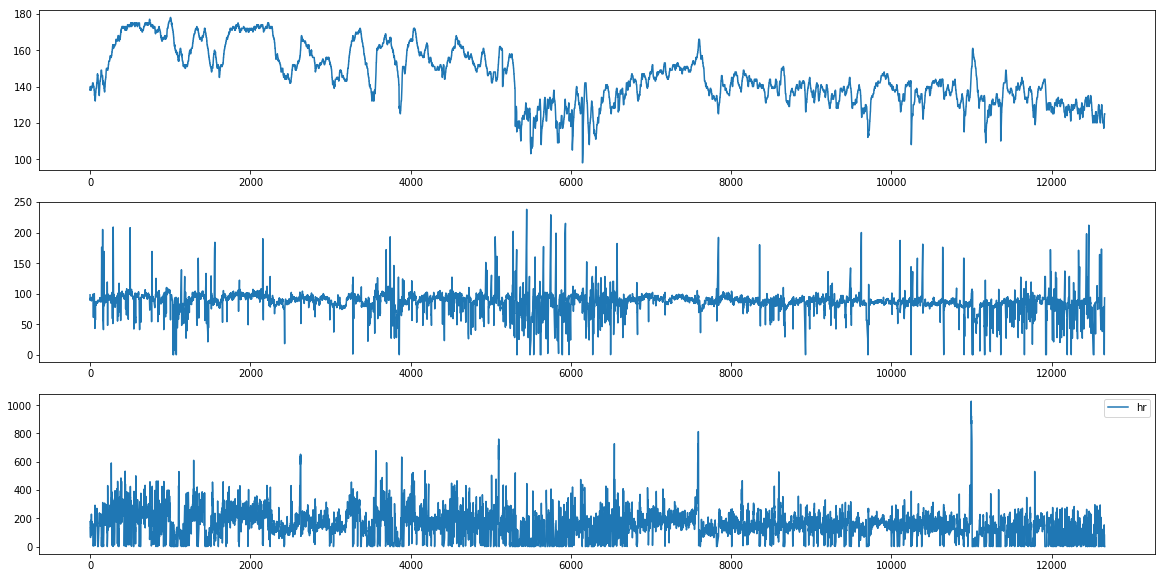

In [319]:
ind = 162
fig = plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(np.arange(len(hrs[ind])), hrs[ind])
plt.subplot(3,1,2)
plt.plot(np.arange(len(hrs[ind])), cads[ind])
plt.subplot(3,1,3)
plt.plot(np.arange(len(hrs[ind])), pws[ind])
plt.legend(['hr', 'cad', 'pw'])

In [323]:
df3 = pd.DataFrame(pw_hr3)
df3_roll = df3.rolling(20,win_type='exponential').sum(tau=0.5)
df3_ewm = df3.ewm(span=20,min_periods=12,adjust=False).mean()

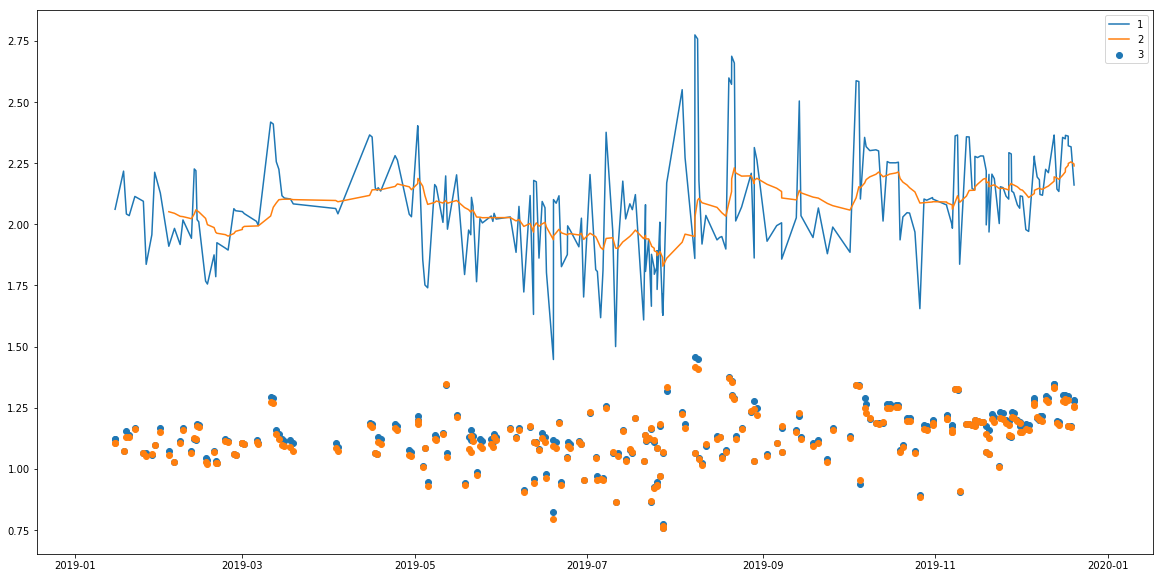

In [327]:
pw_hr = list(np.array(pw_avg)/np.array(hr_avg))
fig = plt.figure(figsize=(20,10))
plt.scatter(dates, pw_hr)
plt.scatter(dates, pw_hr2)
plt.plot(dates, pw_hr3)
plt.plot(dates, list(df3_ewm[0]))
# plt.plot(dates, list(df3_roll[0]))
plt.legend(['1','2','3'])

In [321]:
np.where(np.array(pw_hr3) > 2.8)[0]

array([], dtype=int64)

In [272]:
dates[np.where(np.array(pw_hr3) > 2.8)[0]]

array(['2019-09-16T19:57:04.000000000', '2019-11-21T00:52:07.000000000',
       '2019-12-05T00:00:00.000000000', '2019-12-05T03:44:00.000000000'],
      dtype='datetime64[ns]')

In [343]:
# Splitting by heart rate zones
# zone 1 = <113
# 2: 113-149
# 3: 149-168
# 4: 168-186
# 5: >186

z1s = []
z2s = []
z3s = []
z4s = []
z5s = []

for i in range(len(all_dfs)):
    z1s.append(np.nanmean(np.array(all_dfs[i][all_dfs[i]['HR'] < 113]['HR'])))
    z2s.append(np.nanmean(np.array(all_dfs[i][(all_dfs[i]['HR'] >= 113) & (all_dfs[i]['HR'] < 149)]['HR'])))
    z3s.append(np.nanmean(np.array(all_dfs[i][(all_dfs[i]['HR'] >= 149) & (all_dfs[i]['HR'] < 168)]['HR'])))
    z4s.append(np.nanmean(np.array(all_dfs[i][(all_dfs[i]['HR'] >= 168) & (all_dfs[i]['HR'] < 186)]['HR'])))
    z5s.append(np.nanmean(np.array(all_dfs[i][all_dfs[i]['HR'] >= 186]['HR'])))
    
dfz1 = pd.DataFrame(z1s)
dfz2 = pd.DataFrame(z2s)
dfz3 = pd.DataFrame(z3s)
dfz4 = pd.DataFrame(z4s)
dfz5 = pd.DataFrame(z5s)
z1_ewm = dfz1.ewm(span=20,min_periods=12,adjust=False).mean()
z2_ewm = dfz2.ewm(span=20,min_periods=12,adjust=False).mean()
z3_ewm = dfz3.ewm(span=20,min_periods=12,adjust=False).mean()
z4_ewm = dfz4.ewm(span=20,min_periods=12,adjust=False).mean()
z5_ewm = dfz5.ewm(span=20,min_periods=12,adjust=False).mean()

(array([737060., 737119., 737180., 737241., 737303., 737364., 737425.]),
 <a list of 7 Text xticklabel objects>)

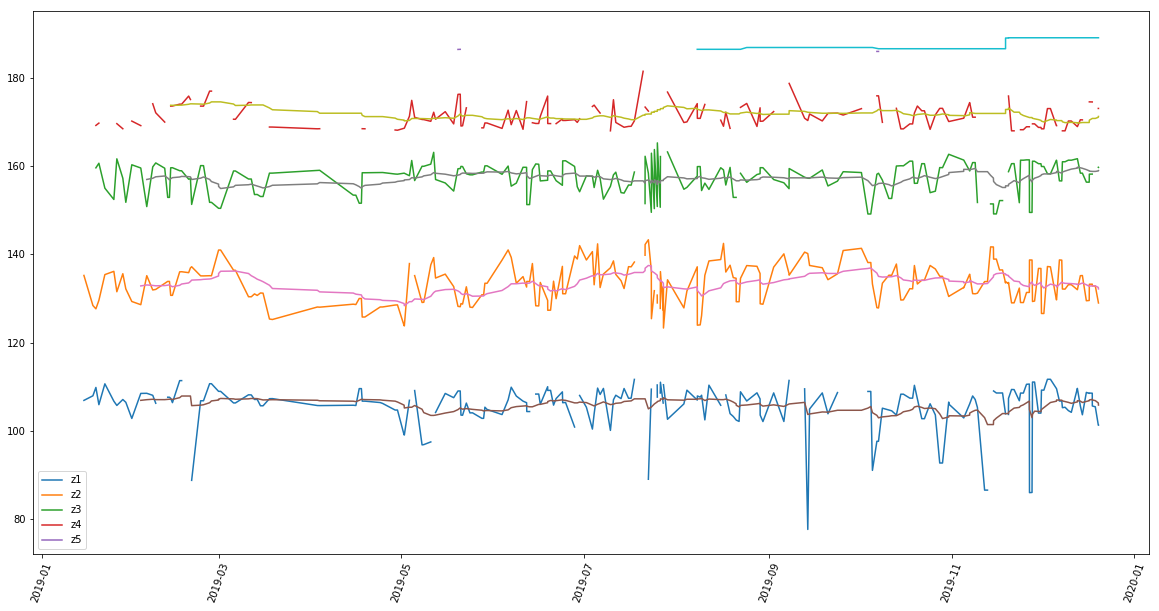

In [349]:
fig = plt.figure(figsize=(20,10))
plt.plot(dates, z1s)
plt.plot(dates, z2s)
plt.plot(dates, z3s)
plt.plot(dates, z4s)
plt.plot(dates, z5s)
plt.plot(dates, list(z1_ewm[0]))
plt.plot(dates, list(z2_ewm[0]))
plt.plot(dates, list(z3_ewm[0]))
plt.plot(dates, list(z4_ewm[0]))
plt.plot(dates, list(z5_ewm[0]))
plt.legend(['z1', 'z2','z3','z4','z5'])
plt.xticks(rotation=70)


In [336]:
np.nanmean(np.array(all_dfs[0][(all_dfs[0]['HR'] >= 113) & (all_dfs[0]['HR'] < 149)]['HR']))

135.21052631578948